In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()

import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.metrics import r2_score
#need this for the colourbar of the 2D histogram

import matplotlib
matplotlib.rcParams.update({'font.size': 14})


from DataAnalysis import DataAnalysis

In [3]:
mc = DataAnalysis(load=True, eventfile="./data/new_moo/3-31/MC_events.csv", clusterfile="./data/new_moo/3-31/MC_clusters.csv")
moo = DataAnalysis(load=True, eventfile="./data/new_moo/3-31/events.csv", clusterfile="./data/new_moo/3-31/clusters.csv")

In [4]:
naive = DataAnalysis()
naive.load_eventdf("./data/new_moo/3-31/events.csv")
naive.make_clusterdf(basicfit=True)

In [5]:
mc.filter_fit(100,5)
naive.filter_fit(100,5)
moo.filter_fit(100,5)
#mc.clusterdf = mc.clusterdf[mc.clusterdf['Channels'] <= 5]
#naive.clusterdf = naive.clusterdf[naive.clusterdf['Channels'] <= 5]
#moo.clusterdf = moo.clusterdf[moo.clusterdf['Channels'] <= 5]

In [6]:
mc.clusterdf = mc.clusterdf[mc.clusterdf['Cluster'].isin(moo.clusterdf['Cluster'])]
mc.eventdf = mc.eventdf[mc.eventdf['Cluster'].isin(moo.clusterdf['Cluster'])]

naive.clusterdf = naive.clusterdf[naive.clusterdf['Cluster'].isin(moo.clusterdf['Cluster'])]
naive.eventdf = naive.eventdf[naive.eventdf['Cluster'].isin(moo.clusterdf['Cluster'])]

In [7]:
moo.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,8,8,18191.2,0.07,0.749098,0.175088,-0.258265,2,0,-28.721874,"[-113.468818, -18.120891, 344.400277, -0.16213..."
1,2,5,5,28126.2,0.04,0.583498,0.884857,-0.527019,0,0,-11.812328,"[-49.33073, 166.957814, 242.652925, 0.769523, ..."
2,3,10,10,34439.2,0.09,0.917547,0.440553,0.605379,0,0,-23.051348,"[31.250423, -160.780139, 215.210505, 0.139358,..."
3,4,13,13,99289.2,0.12,1.049743,1.001125,0.389611,0,0,-37.206412,"[28.460418, -15.828655, 61.284392, -0.439194, ..."
4,5,8,8,127508.2,0.07,0.914895,0.680333,1.376815,0,0,-20.967991,"[-156.369807, -53.960308, -290.415726, 0.26709..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1780,6,6,21685688.2,0.05,0.652835,0.114199,-0.651218,0,0,-13.107675,"[-349.621354, -117.987531, 70.497943, 0.113931..."
1587,1781,9,9,21688662.2,0.08,0.851246,0.517911,-0.716046,0,0,-40.312451,"[108.825795, 112.36922, 277.378926, -0.49334, ..."
1588,1782,11,11,21689848.2,0.10,0.924406,0.951692,-0.203273,0,0,-25.297433,"[-188.60234, -48.284677, 309.781547, 0.74052, ..."
1589,1783,11,11,21691679.2,0.10,0.782134,0.439888,-0.568467,0,0,-41.514371,"[-45.070483, -259.753046, 306.294666, 0.424965..."


In [8]:
moo.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster,Hit,PathLength,dEdx
0,0,843,18188.00,1,3.2,3.2,40815.325767,0.0,0.0,0.0,False,0,18191.20,0,True,50.776310,803.826155
1,0,844,18188.01,1,3.2,3.2,49613.666691,0.0,0.0,0.0,False,0,18191.21,0,True,50.776310,977.102649
2,0,845,18188.02,1,3.2,3.2,5609.970594,0.0,0.0,0.0,False,0,18191.22,0,True,6.357089,882.474718
3,0,849,18188.03,1,3.2,3.2,73551.881866,0.0,0.0,0.0,False,0,18191.23,0,True,43.112364,1706.050764
4,0,850,18188.04,1,3.2,3.2,39611.279056,0.0,0.0,0.0,False,0,18191.24,0,True,50.776310,780.113390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12860,0,735,21736080.01,1,3.2,3.2,55165.935516,0.0,0.0,0.0,False,1964,21736083.21,1784,True,55.306880,997.451591
12861,0,736,21736080.02,1,3.2,3.2,3899.418403,0.0,0.0,0.0,False,1964,21736083.22,1784,True,5.196767,750.354705
12862,0,764,21736080.03,1,3.2,3.2,56478.759604,0.0,0.0,0.0,False,1964,21736083.23,1784,True,54.550384,1035.350358
12863,0,775,21736080.04,1,3.2,3.2,21116.951736,0.0,0.0,0.0,False,1964,21736083.24,1784,True,23.520707,897.802596


In [34]:
mc.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,Track,MaxTime,Cluster,Hit,PathLength,dEdx
0,0,843,18188.00,1,3.2,3.2,40815.325767,0.0,0.0,0.0,False,0,18191.20,0,True,22.243770,1834.910421
1,0,844,18188.01,1,3.2,3.2,49613.666691,0.0,0.0,0.0,False,0,18191.21,0,True,50.331192,985.743918
2,0,845,18188.02,1,3.2,3.2,5609.970594,0.0,0.0,0.0,False,0,18191.22,0,True,6.956793,806.401805
3,0,849,18188.03,1,3.2,3.2,73551.881866,0.0,0.0,0.0,False,0,18191.23,0,True,23.800308,3090.375236
4,0,850,18188.04,1,3.2,3.2,39611.279056,0.0,0.0,0.0,False,0,18191.24,0,True,50.331192,787.012531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13394,0,735,21736080.01,1,3.2,3.2,55165.935516,0.0,0.0,0.0,False,1964,21736083.21,1784,True,55.032485,1002.424944
13395,0,736,21736080.02,1,3.2,3.2,3899.418403,0.0,0.0,0.0,False,1964,21736083.22,1784,True,3.036481,1284.190095
13396,0,764,21736080.03,1,3.2,3.2,56478.759604,0.0,0.0,0.0,False,1964,21736083.23,1784,True,39.163510,1442.127131
13397,0,775,21736080.04,1,3.2,3.2,21116.951736,0.0,0.0,0.0,False,1964,21736083.24,1784,True,27.481360,768.409991


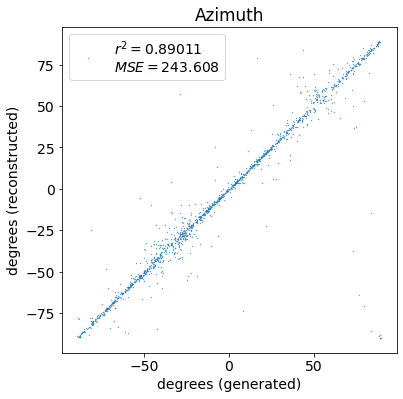

In [21]:
plt.figure(figsize=(6,6))
plt.title("Azimuth")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

In [11]:
sum(abs(true-pred)) / len(true)

4.15630449957848

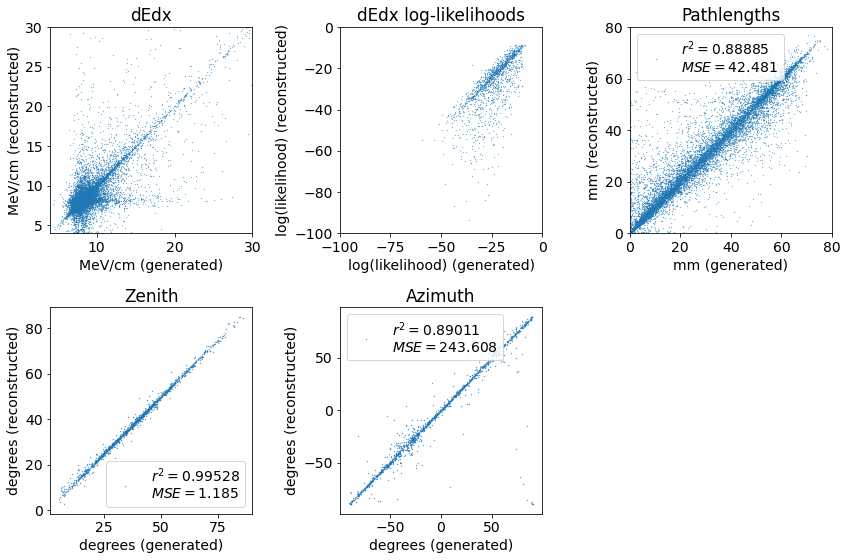

In [12]:
from Helper import *

dEdx_pdf = make_pdf('./data/pdf/dEdx/bins_dEdx_muon.csv', './data/pdf/dEdx/values_dEdx_muon.csv', domain_range=[0,190])
clusters = np.array(mc.get_clusterdf()['Cluster'])

log_likelihoods_mc = np.array([np.log(dEdx_pdf(np.array(mc.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])
log_likelihoods_moo = np.array([np.log(dEdx_pdf(np.array(moo.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])


# min_path_test = test.get_eventdf()[test.get_eventdf()['PathLength'] > 30]
# min_path_mc = mc.get_eventdf()[test.get_eventdf()['PathLength'] > 30]

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title("dEdx")
#plt.scatter(np.array(mc.get_eventdf()['dEdx'])/100, np.array(test.get_eventdf()['dEdx'])/100, s=5)
true = np.array(mc.get_eventdf()['dEdx'])/100
pred = np.array(moo.get_eventdf()['dEdx'])/100
#r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05) #, label=r'$r^2='+str(round(r2,5)) + '$')
plt.xlabel("MeV/cm (generated)")
plt.ylabel("MeV/cm (reconstructed)")
plt.xlim(4,30)
plt.ylim(4,30)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()

plt.subplot(2,3,2)
plt.title("dEdx log-likelihoods")
true = log_likelihoods_mc
pred = log_likelihoods_moo
# r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05)
#plt.scatter(, , s=1)
plt.xlim(-100,0)
plt.ylim(-100,0)
plt.xlabel("log(likelihood) (generated)")
plt.ylabel("log(likelihood) (reconstructed)")
# plt.legend()

plt.subplot(2,3,3)
plt.title("Pathlengths")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(moo.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()

plt.subplot(2,3,4)
plt.title("Zenith")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.subplot(2,3,5)
plt.title("Azimuth")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.tight_layout()


Text(0, 0.5, 'log(likelihood) (reconstructed)')

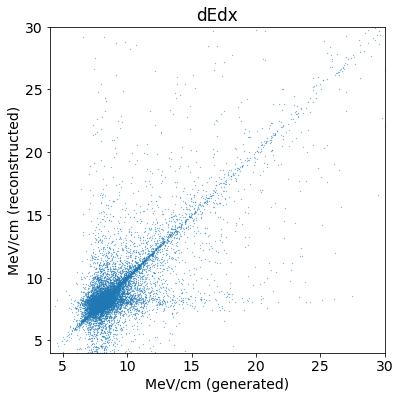

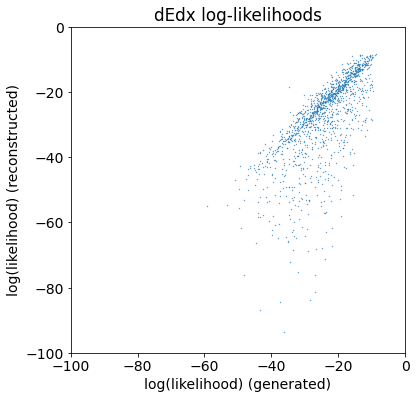

In [13]:
from Helper import *

dEdx_pdf = make_pdf('./data/pdf/dEdx/bins_dEdx_muon.csv', './data/pdf/dEdx/values_dEdx_muon.csv', domain_range=[0,190])
clusters = np.array(mc.get_clusterdf()['Cluster'])

log_likelihoods_mc = np.array([np.log(dEdx_pdf(np.array(mc.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])
log_likelihoods_moo = np.array([np.log(dEdx_pdf(np.array(moo.get_cluster(c)['dEdx'])/100)).sum() for c in clusters])


# min_path_test = test.get_eventdf()[test.get_eventdf()['PathLength'] > 30]
# min_path_mc = mc.get_eventdf()[test.get_eventdf()['PathLength'] > 30]



plt.figure(figsize=(6,6))
plt.title("dEdx")
#plt.scatter(np.array(mc.get_eventdf()['dEdx'])/100, np.array(test.get_eventdf()['dEdx'])/100, s=5)
true = np.array(mc.get_eventdf()['dEdx'])/100
pred = np.array(moo.get_eventdf()['dEdx'])/100
#r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.05) #, label=r'$r^2='+str(round(r2,5)) + '$')
plt.xlabel("MeV/cm (generated)")
plt.ylabel("MeV/cm (reconstructed)")
plt.xlim(4,30)
plt.ylim(4,30)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()

plt.figure(figsize=(6,6))
plt.title("dEdx log-likelihoods")
true = log_likelihoods_mc
pred = log_likelihoods_moo
# r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=.1)
#plt.scatter(, , s=1)
plt.xlim(-100,0)
plt.ylim(-100,0)
plt.xlabel("log(likelihood) (generated)")
plt.ylabel("log(likelihood) (reconstructed)")
# plt.legend()





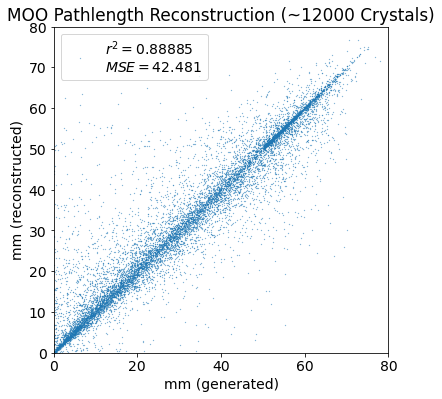

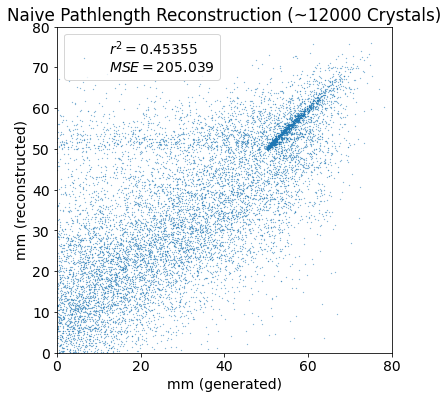

In [14]:
plt.figure(figsize=(6,6))
plt.title("MOO Pathlength Reconstruction (~12000 Crystals)")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(moo.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()

plt.figure(figsize=(6,6))
plt.title("Naive Pathlength Reconstruction (~12000 Crystals)")
true = np.array(mc.get_eventdf()['PathLength'])
pred = np.array(naive.get_eventdf()['PathLength'])
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
plt.scatter(true,pred , s=.05, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.ylabel("mm (reconstructed)")
plt.xlabel("mm (generated)")
plt.xlim(0,80)
plt.ylim(0,80)
plt.legend()

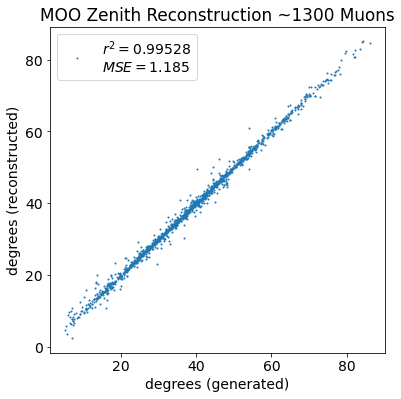

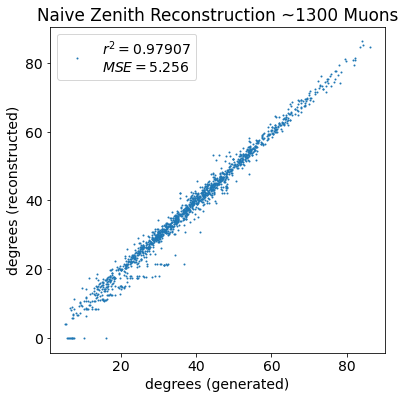

In [15]:
plt.figure(figsize=(6,6))
plt.title("MOO Zenith Reconstruction ~1300 Muons")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.figure(figsize=(6,6))
plt.title("Naive Zenith Reconstruction ~1300 Muons")
true = np.array(mc.get_clusterdf()['Zenith']) * 180 / np.pi
pred = np.array(naive.get_clusterdf()['Zenith']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

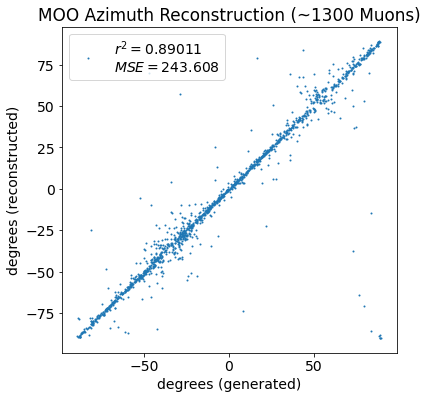

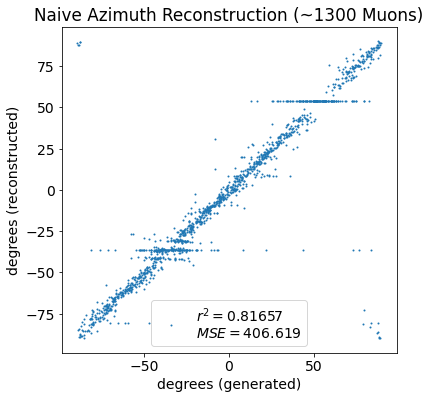

In [23]:
plt.figure(figsize=(6,6))
plt.title("MOO Azimuth Reconstruction (~1300 Muons)")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

plt.figure(figsize=(6,6))
plt.title("Naive Azimuth Reconstruction (~1300 Muons)")
true = np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi
pred = np.array(naive.get_clusterdf()['Azimuth']) * 180 / np.pi
true = true[~np.isnan(pred)]
pred = pred[~np.isnan(pred)]
r2 = r2_score(true, pred)
MSE = sum((true - pred)**2) / len(true)
r2 = r2_score(true[~np.isnan(pred)], pred[~np.isnan(pred)])
plt.scatter(true,pred , s=1, label=r'$r^2='+str(round(r2,5))+'$\n$MSE=' + str(round(MSE,3)) + '$')
#plt.scatter(np.array(mc.get_clusterdf()['Azimuth']) * 180 / np.pi, np.array(moo.get_clusterdf()['Azimuth']) * 180 / np.pi, s=1)
plt.xlabel("degrees (generated)")
plt.ylabel("degrees (reconstructed)")
plt.legend()

In [17]:
moo.get_clusterdf(fitline=False)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood
0,0,8,8,18191.2,0.07,0.749098,0.175088,-0.258265,2,0,-28.721874
1,2,5,5,28126.2,0.04,0.583498,0.884857,-0.527019,0,0,-11.812328
2,3,10,10,34439.2,0.09,0.917547,0.440553,0.605379,0,0,-23.051348
3,4,13,13,99289.2,0.12,1.049743,1.001125,0.389611,0,0,-37.206412
4,5,8,8,127508.2,0.07,0.914895,0.680333,1.376815,0,0,-20.967991
...,...,...,...,...,...,...,...,...,...,...,...
1586,1780,6,6,21685688.2,0.05,0.652835,0.114199,-0.651218,0,0,-13.107675
1587,1781,9,9,21688662.2,0.08,0.851246,0.517911,-0.716046,0,0,-40.312451
1588,1782,11,11,21689848.2,0.10,0.924406,0.951692,-0.203273,0,0,-25.297433
1589,1783,11,11,21691679.2,0.10,0.782134,0.439888,-0.568467,0,0,-41.514371


In [18]:
mc.get_clusterdf(fitline=False)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood
0,0,8,8,18191.2,0.07,1.057874,0.114782,1.467955,0,0,-31.976063
1,2,5,5,28126.2,0.04,0.714171,0.910777,-0.503232,0,0,-12.942503
2,3,10,10,34439.2,0.09,0.903618,0.442158,0.589636,0,0,-23.837716
3,4,13,13,99289.2,0.12,1.063137,1.006014,0.393032,0,0,-35.445201
4,5,8,8,127508.2,0.07,0.909927,0.676132,1.378385,0,0,-20.746353
...,...,...,...,...,...,...,...,...,...,...,...
1651,1780,6,6,21685688.2,0.05,0.904674,0.131127,1.274017,0,0,-13.993581
1652,1781,9,9,21688662.2,0.08,1.024937,0.495825,-0.691789,0,0,-22.296535
1653,1782,11,11,21689848.2,0.10,0.929778,0.952722,-0.195494,0,0,-25.054339
1654,1783,11,11,21691679.2,0.10,0.783617,0.443519,-0.557306,0,0,-30.330756


Text(0, 0.5, 'Number of Channels')

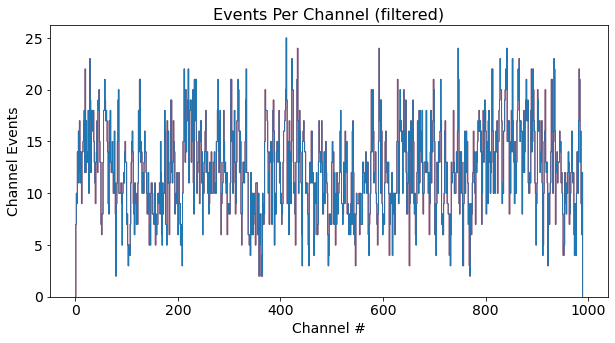

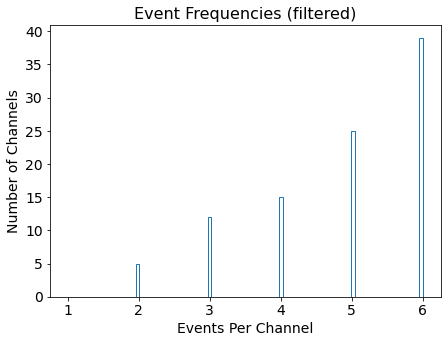

In [19]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
array1=plt.hist(moo.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array1 = plt.hist(mc.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.linspace(1,6,100), histtype='step')
#plt.hist(array2[0], np.linspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [12]:
#print("Messy cluster rate: " + str(naive.get_clusterrate()))
print("Messy cluster rate: " + str(moo.get_clusterrate()))
#data.filter_clusterdf(100, 5) #(NRMSE, channels)
#print("Filtered cluster rate: " + str(data.get_clusterrate()))
print("MC cluster rate: " + str(mc.get_clusterrate()))

clusters: 681
run time: 2636943.0
Messy cluster rate: 0.00025825359137455757
clusters: 681
run time: 2636943.0
MC cluster rate: 0.00025825359137455757


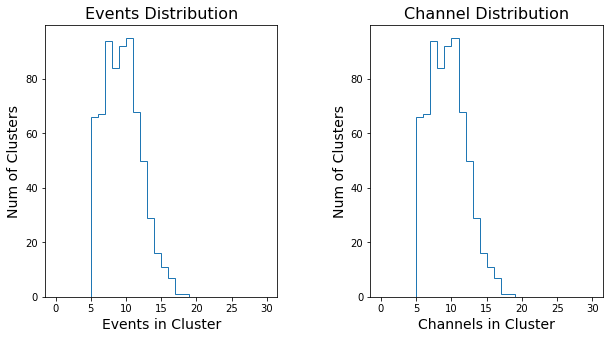

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(mc.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(mc.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


#plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

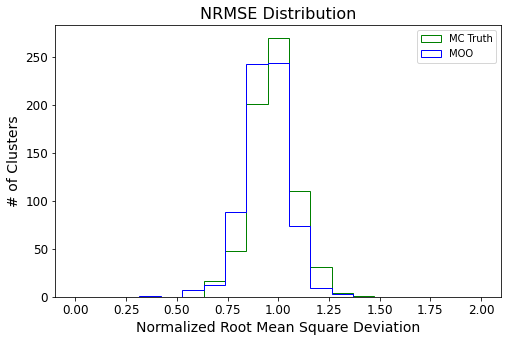

In [14]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(mc.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='g', label="MC Truth")

array=plt.hist(moo.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='b' , label="MOO")

#array=plt.hist(naive.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='r', label="PCA")

plt.legend()

#line = plt.axvline(1)

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

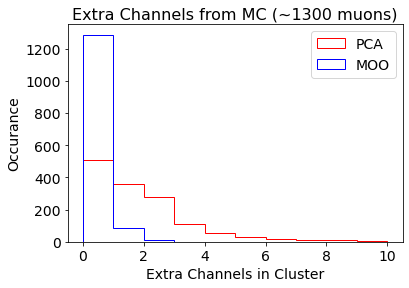

In [24]:
plt.figure()
plt.title("Extra Channels from MC (~1300 muons)", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(naive.get_clusterdf()['ExtraCh'], np.linspace(0,10,11), color='r', histtype='step', label="PCA")
array = plt.hist(moo.get_clusterdf()['ExtraCh'], np.linspace(0,10,11), histtype='step', color='b', label="MOO")

plt.legend()

#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

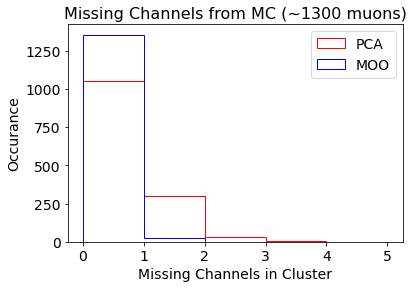

In [26]:
plt.figure()
plt.title("Missing Channels from MC (~1300 muons)", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(naive.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='r', histtype='step', label="PCA")
array = plt.hist(moo.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='b', histtype='step', label='MOO')

plt.legend()

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


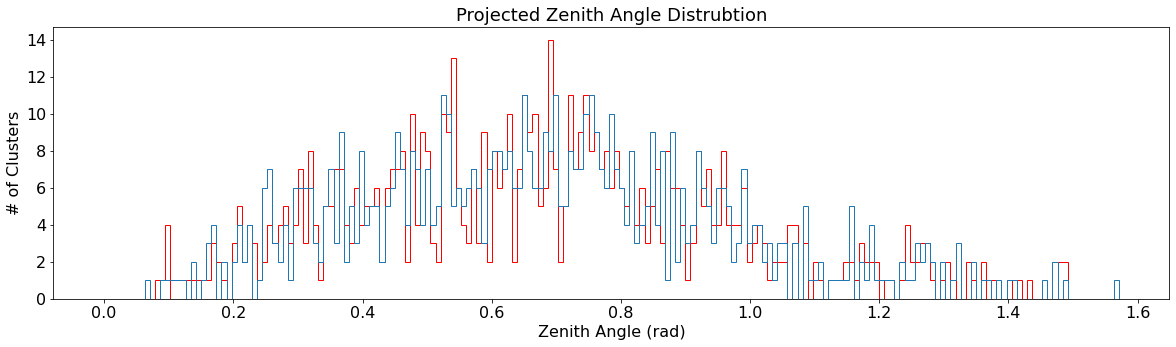

In [17]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Zenith'], np.linspace(0,np.pi/2,200), histtype='step', color='r')
array=plt.hist(moo.get_clusterdf()['Zenith'], np.linspace(0,np.pi/2,200), histtype='step')
#array=plt.hist(naive.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step')





#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

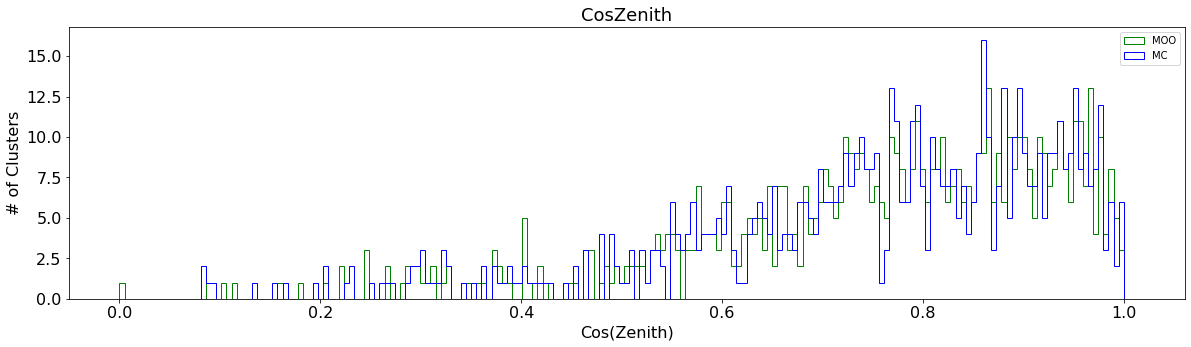

In [18]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("CosZenith", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
#array = plt.hist([math.cos(x) for x in naive.get_clusterdf()['Zenith']], np.linspace(0,1.01,500), histtype='step', color='r', label='PCA')
array = plt.hist([np.cos(x) for x in moo.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='g', label='MOO')
array = plt.hist([np.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='b', label="MC")

#plt.gca().set_yscale("log")

plt.legend()


#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

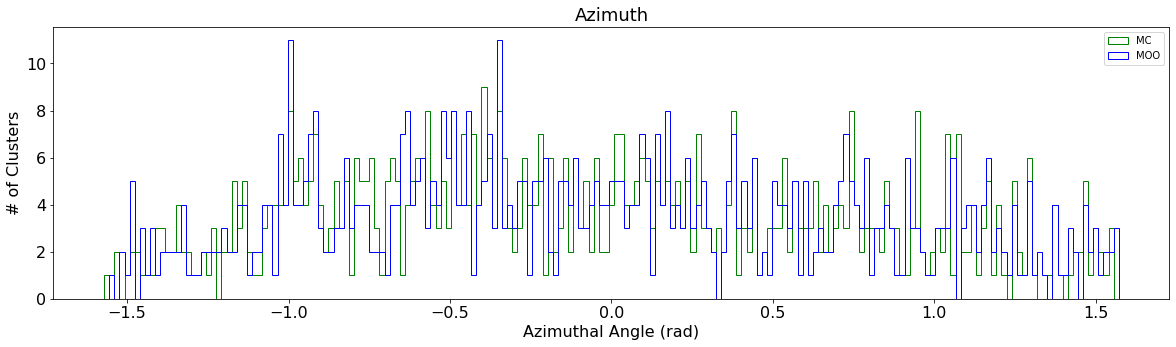

In [19]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

array=plt.hist(mc.get_clusterdf()['Azimuth'], np.linspace(-np.pi/2,np.pi/2,200), histtype='step', color='g', label="MC")
array=plt.hist(moo.get_clusterdf()['Azimuth'], np.linspace(-np.pi/2,np.pi/2,200), histtype='step', color='b', label="MOO")
#array=plt.hist(naive.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,500), histtype='step', color='r', label="PCA")

#plt.gca().set_yscale("log")


plt.legend()


#plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [20]:
moo.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,Likelihood,Fitline
0,0,8,8,6428.2,0.07,0.737775,0.957636,0.913764,0,0,-27.384459,"[-114.886942, 180.812282, 132.589984, -0.02005..."
1,1,6,6,14663.2,0.05,1.017042,0.505310,0.135497,0,0,-27.070589,"[336.844777, -115.548681, -119.834416, -0.3481..."
2,2,7,7,16425.2,0.06,0.876811,0.892219,1.033484,0,0,-16.629648,"[-97.143831, -44.438186, -347.516135, -0.07399..."
3,3,10,10,17481.2,0.09,0.805977,0.463477,1.170459,0,0,-25.152991,"[272.501681, 183.01951, -288.91317, 0.102864, ..."
4,4,11,11,21355.2,0.10,0.972534,0.736435,1.152455,1,0,-41.492215,"[183.513083, -19.265799, -0.031461, -0.142748,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
775,937,13,13,11547163.2,0.12,0.929186,0.797618,1.250312,0,0,-28.456288,"[110.908043, 46.483601, -34.205311, -0.219707,..."
777,939,13,13,11564830.2,0.12,0.910151,0.697781,-1.384698,1,0,-37.032334,"[254.458649, 36.921287, 163.011005, 0.469164, ..."
779,942,7,7,11588434.2,0.06,0.809990,0.326100,0.307107,1,0,-12.646357,"[262.958438, 103.984921, 291.781969, 0.189039,..."
780,943,8,8,11589036.2,0.07,0.967750,0.482127,0.720212,0,0,-14.814514,"[-238.451051, -24.412961, 176.645834, -0.10031..."


In [203]:
moo_zenith_deltas = []
naive_zenith_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_z = np.cos(moo.get_clusterdf()['Zenith'].values[i])
    naive_z = np.cos(naive.get_clusterdf()['Zenith'].values[i])
    mc_z = np.cos(mc.get_clusterdf()['Zenith'].values[i])
    
    moo_zenith_deltas.append(abs(moo_z - mc_z) * 180/np.pi)
    naive_zenith_deltas.append(abs(naive_z - mc_z) * 180 / np.pi)
    
print(np.mean(moo_zenith_deltas))
print(np.mean(naive_zenith_deltas))

0.3608779675082957
0.7740993940140364


Text(0.5, 0, 'degrees')

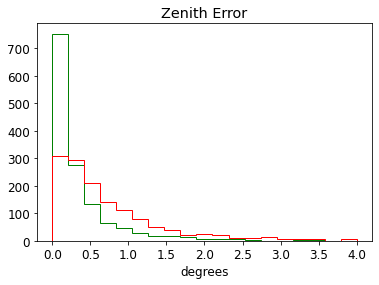

In [204]:
plt.title("Zenith Error")

plt.hist(moo_zenith_deltas, np.linspace(0,4,20), histtype='step', color="g", label='MOO')
array = plt.hist(naive_zenith_deltas, np.linspace(0,4,20), histtype='step', color='r', label="PCA")

plt.xlabel("degrees")

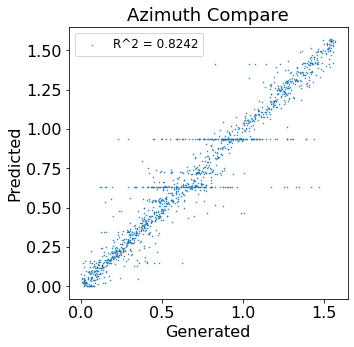

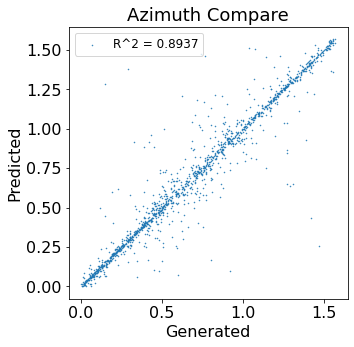

In [205]:
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Zenith'] >= .4]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]
#naive_df = naive.get_clusterdf()[naive.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]

#naive_df = naive.get_clusterdf()[abs(naive.get_clusterdf()['Zenith']) > .01]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]


plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_naive = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, naive.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_naive = np.round(r2_naive, decimals = 4)

label = "R^2 = {}".format(r2_naive)

array = plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(naive.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()



plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_moo = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, moo.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_moo = np.round(r2_moo, decimals = 4)

label = "R^2 = {}".format(r2_moo)

plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(moo.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()

In [27]:
moo_azimuth_deltas = []
naive_azimuth_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_az = abs(moo.get_clusterdf()['Azimuth'].values[i])
    naive_az = abs(naive.get_clusterdf()['Azimuth'].values[i])
    mc_az = abs(mc.get_clusterdf()['Azimuth'].values[i])
    
    moo_azimuth_deltas.append(abs(moo_az - mc_az) * 180/np.pi)
    naive_azimuth_deltas.append(abs(naive_az - mc_az) * 180 / np.pi)
    
    #if abs(moo_az - mc_az) * 180/np.pi > 30:
    #    print(moo.get_clusterdf()['Cluster'].values[i])
    
print(np.mean(moo_azimuth_deltas))
print(np.mean(naive_azimuth_deltas))

2.861176132117014
3.9470801915144427


In [28]:
#moo.get_clusterdf()[moo.get_clusterdf()['Cluster']==3133]

In [29]:
#sorted(moo_azimuth_deltas, reverse=True)

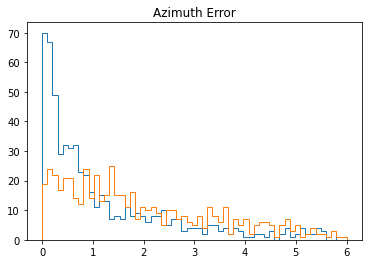

In [30]:
plt.title("Azimuth Error")

array = plt.hist(moo_azimuth_deltas, np.linspace(0,6,60), histtype='step')
array =plt.hist(naive_azimuth_deltas, np.linspace(0,6,60), histtype='step')

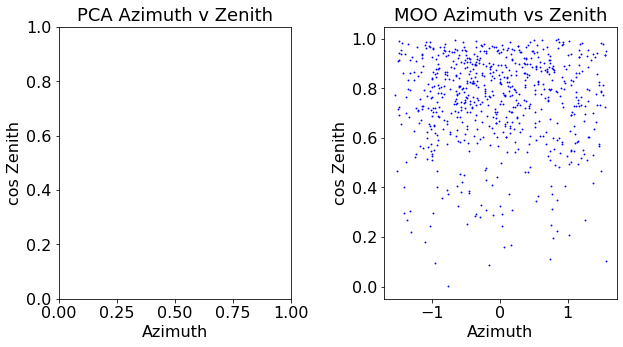

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax1.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax1.set_title("PCA Azimuth v Zenith", fontsize=18)
ax1.set_ylabel('cos Zenith',fontsize=16)
ax1.set_xlabel('Azimuth',fontsize=16)

#array = ax1.scatter(naive.get_clusterdf()['Azimuth'], [math.cos(x) for x in naive.get_clusterdf()['Zenith']], marker='.', s=3, color='r')


#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax2.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax2.set_title("MOO Azimuth vs Zenith", fontsize=18)
ax2.set_ylabel('cos Zenith',fontsize=16)
ax2.set_xlabel('Azimuth',fontsize=16)

array = ax2.scatter(moo.get_clusterdf()['Azimuth'],[np.cos(x) for x in moo.get_clusterdf()['Zenith']], color='b',marker='.', s=3)




In [28]:
# Build this into MonteCarlo class??

import copy

moo_theta_deltas = []
naive_theta_deltas = []

for c in moo.get_clusterdf()['Cluster'].values:
    
    #mcfit = copy.deepcopy(mc.get_clusterdf()).iloc[i]['Fitline']
    #moofit = copy.deepcopy(moo.get_clusterdf()).iloc[i]['Fitline']
    
    mcfit = copy.copy(mc.get_fitline(c))
    moofit = copy.copy(moo.get_fitline(c))
    nfit = copy.copy(naive.get_fitline(c))

    v_mc = mcfit[3:]
    v_mc /= np.linalg.norm(v_mc)

    v_moo = moofit[3:]
    v_moo /= np.linalg.norm(v_moo)
    
    v_n = nfit[3:]
    v_n /= np.linalg.norm(v_n)

    if v_mc.dot(v_moo) < 0:
        v_moo *= -1
        
    if v_mc.dot(v_n) < 0:
        v_n *= -1

    theta = np.arccos(v_mc.dot(v_moo)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    
    moo_theta_deltas.append(theta)
    
    #if theta > 8:
    #    print(c)
    
    
    theta = np.arccos(v_mc.dot(v_n)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * np.pi)
    
    naive_theta_deltas.append(theta)

moo_theta_deltas = np.array(moo_theta_deltas)
naive_theta_deltas = np.array(naive_theta_deltas)
    
    
print(np.mean(naive_theta_deltas))
print(np.mean(moo_theta_deltas))

2.7044712823193486
1.6247960373766368


In [29]:
print(sum(naive_theta_deltas**2) / len(naive_theta_deltas))
print(sum(moo_theta_deltas**2) / len(moo_theta_deltas))

12.888669693842415
8.106891888307723


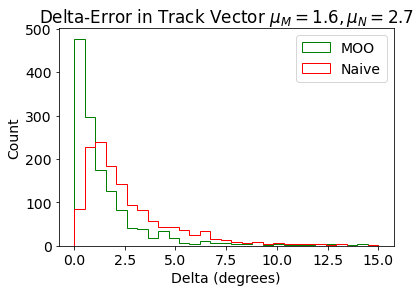

In [31]:
plt.figure()
plt.title(r"Delta-Error in Track Vector $\mu_M=1.6, \mu_N=$2.7")

plt.ylabel("Count")
plt.xlabel("Delta (degrees)")

array = plt.hist(moo_theta_deltas, np.linspace(0,15, 30),  histtype='step', color='g', label="MOO")
array = plt.hist(naive_theta_deltas, np.linspace(0,15, 30), histtype='step', color='r', label="Naive")

plt.legend()

#plt.gca().set_yscale("log")

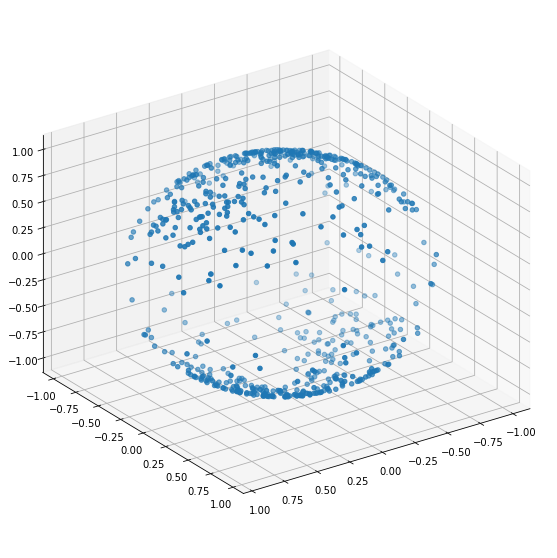

In [43]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*np.concatenate(moo.get_clusterdf()['Fitline'].values).reshape(-1,6)[:,3:].T)

#plt.xlim([-1,1])
#plt.ylim([-1,1])
#ax.set_zlim([-350,350])

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')

ax.view_init(25, 55)

plt.show()

NameError: name 'data' is not defined

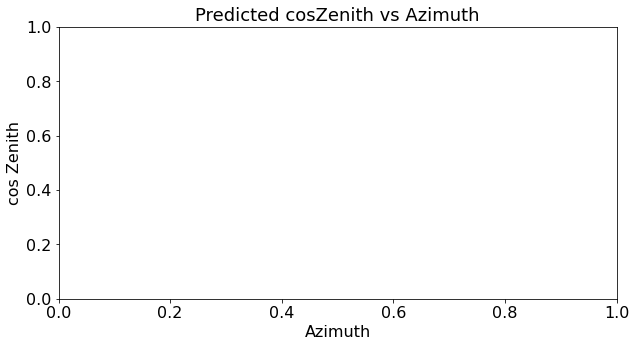

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Predicted cosZenith vs Azimuth", fontsize=18)
plt.ylabel('cos Zenith',fontsize=16)
plt.xlabel('Azimuth',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], [math.cos(x) for x in data.get_clusterdf()['Zenith']])

xdata= data.get_clusterdf()['Azimuth'].values
ydata= [math.cos(x) for x in data.get_clusterdf()['Zenith'].values]
#x_bins= np.linspace(-math.pi/2,math.pi/2,20)
#y_bins= np.linspace(0,1,20)

counts,_,_= np.histogram2d(xdata, ydata, weights=theta_deltas, bins=(x_bins, y_bins))

pcolor=ax.pcolormesh(x_bins, y_bins, counts,norm=LogNorm())
#cbar=fig.colorbar(pcolor)



#h = plt.hist2d(xdata, ydata, bins=12,  weights=theta_deltas, cmap='cividis', norm=LogNorm())
cbar= plt.colorbar()


In [ ]:
a = [[1,2,3],[4,5,6]]

In [ ]:
[x[::-1] for x in a[::-1]]